In [1]:
import numpy as np
import copy

from scipy.optimize import least_squares

#--matplotlib
import matplotlib
from matplotlib.lines import Line2D
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rc('text',usetex=True)
import pylab as py
from matplotlib import colors
import matplotlib.gridspec as gridspec

<ipython-input-1-533524d79e47>:9: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


# Create pseudodata

In [2]:
pdf = lambda x,a,b: x**a * (1-x)**b #--can play with more parameters here! Common extra multiplicative terms: (1 + c * x**0.5 + d * x)

In [3]:
X = np.linspace(0.01,0.99,25)

In [4]:
F0 = pdf(X,0.5,3)

uncertainty = 0.15*F0 #--15 percent

F0 += np.random.randn(len(X))*uncertainty


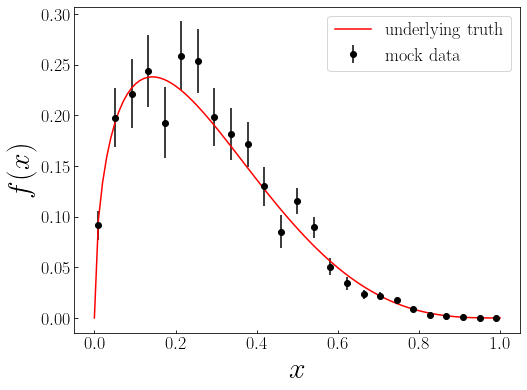

In [5]:
nrows,ncols=1,1
py.figure(figsize=(8*nrows,6*ncols))
ax=py.subplot(nrows,ncols,1)

ax.errorbar(X,F0,yerr=uncertainty,fmt='o',color='k',label=r'$\rm mock~data$')
Xthy = np.linspace(0,1,100)
truth = pdf(Xthy,0.5,3)
ax.plot(Xthy,truth,c='r',label=r'$\rm underlying~truth$')
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$f(x)$',size=30)
ax.tick_params(direction='in',labelsize=18)
ax.legend(fontsize=18)

In [6]:
data={}
data['X'] = X
data['value'] = F0
data['alpha'] = uncertainty

# Perform a Monte Carlo fit of parameters (a,b) to these data

In [7]:
def resample(data):
    npts = len(data['value'])
    data['value']+=np.random.randn(npts)*data['alpha']
        
    return data

In [8]:
def get_residuals(par,tabs):
    
    npts = len(tabs['value'])
    dat = tabs['value']
    alp = tabs['alpha']
    x = tabs['X']
    
    thy = pdf(x,par[0],par[1])
    
    return (dat-thy)/alp

In [9]:
def do_fit(dat,guess):
    tabs = copy.deepcopy(dat)
    tabs = resample(tabs)

    par_fit = least_squares(lambda par: get_residuals(par,tabs),guess).x
    
    return par_fit

In [10]:
params = []

Nfits = 1000

parmin = np.array([-0.9,0])
parmax = np.array([10,10])

for i in range(Nfits):

    guess = parmin + np.random.rand(len(parmin)) * (parmax-parmin)
    pars = do_fit(data,guess)
    params.append(pars)
params=np.array(params)

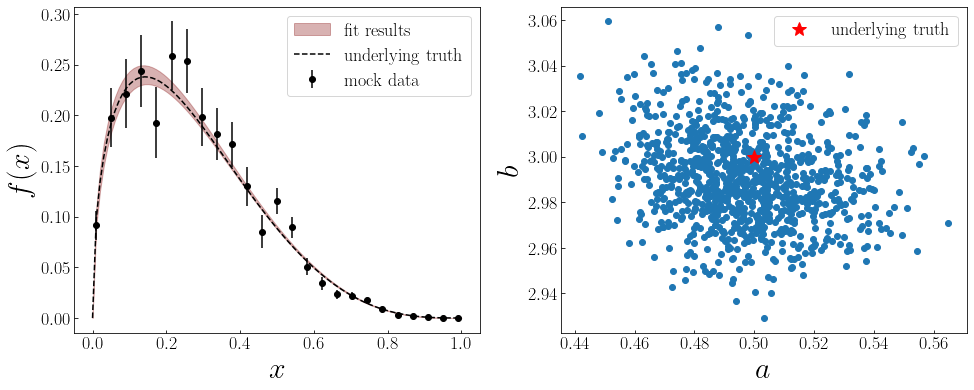

In [11]:
pdfs = []
Xthy = np.linspace(0,1,100)
for i in range(Nfits):
    a,b = params[i][0],params[i][1]
    pdfs.append(pdf(Xthy,a,b))

nrows,ncols=1,2
py.figure(figsize=(8*ncols,6*nrows))
ax=py.subplot(nrows,ncols,1)
ax.errorbar(data['X'],data['value'],yerr=data['alpha'],fmt='o',color='k',label=r'$\rm mock~data$')

mean,std = np.mean(pdfs,axis=0),np.std(pdfs,axis=0)
ax.fill_between(Xthy,mean-std,mean+std,alpha=0.3,color='maroon',label=r'$\rm fit~results$')

ax.plot(Xthy,truth,'k--',label=r'$\rm underlying~truth$')
ax.legend(fontsize=18)
ax.set_xlabel(r'$x$',size=30)
ax.set_ylabel(r'$f(x)$',size=30)
ax.tick_params(direction='in',labelsize=18)

ax=py.subplot(nrows,ncols,2)
ax.scatter(params.T[0],params.T[1])
ax.set_xlabel(r'$a$',size=30)
ax.set_ylabel(r'$b$',size=30)
ax.plot(0.5,3,'r*',ms=15,label=r'$\rm underlying~truth$')
ax.tick_params(direction='in',labelsize=18)
ax.legend(fontsize=18)